In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress','Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 10 Labels from MNIST data set
# 0 T-shirt/top
# 1 Trouser
# 2 Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot

print(trainX.shape)
print(trainY.shape)
print(trainY[0:5])

(60000, 28, 28)
(60000,)
[9 0 0 3 0]


In [4]:
import matplotlib.pyplot as plt 

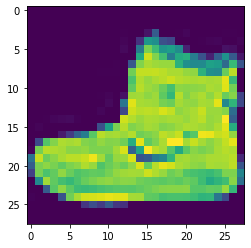

In [5]:
plt.imshow(trainX[0])

In [6]:
trainX = trainX / 255.0
testX = testX / 255.0

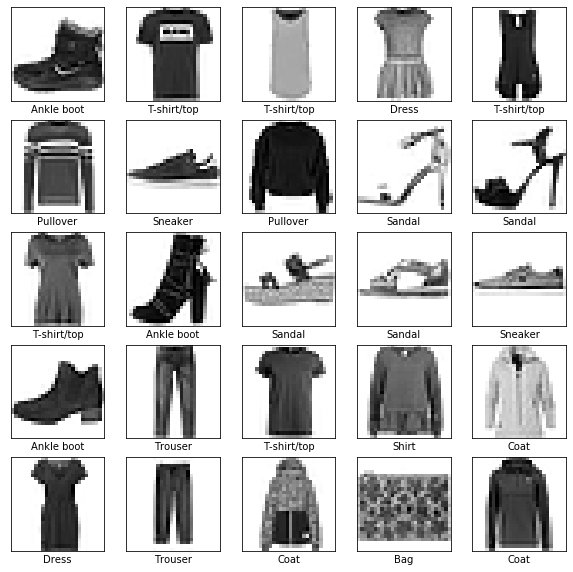

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainY[i]])
plt.show()

In [8]:
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.callbacks import ModelCheckpoint

In [9]:
# Part 1
input = Input(shape=(28, 28, 1))

conv1 = Conv2D(filters=64, kernel_size = 2, activation='relu', padding='same')(input)
pool1 = MaxPooling2D(pool_size=(2,2))(conv1)

conv2 = Conv2D(filters=32, kernel_size = 2, activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D(pool_size=(2,2))(conv2)

flatten = Flatten()(pool2)

hidden1 = Dense(256, activation='relu')(flatten)
output = Dense(10,activation="softmax")(hidden1)

model = Model(inputs=input, outputs=output)

print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               401664

In [10]:
checkpoint = ModelCheckpoint(filepath="best_params.hdf5", monitor="val_accuracy",verbose = 1, save_best_only=True)

In [11]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [12]:
import numpy as np

In [28]:
history = model.fit(trainX[:,:,:,np.newaxis], trainY, epochs=16, callbacks=[checkpoint], validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/16
47936/48000 [============================>.] - ETA: 0s - loss: 0.4279 - accuracy: 0.8460
Epoch 00001: val_accuracy improved from -inf to 0.86817, saving model to best_params.hdf5
48000/48000 [==============================] - 42s 885us/sample - loss: 0.4277 - accuracy: 0.8461 - val_loss: 0.3656 - val_accuracy: 0.8682
Epoch 2/16
47968/48000 [============================>.] - ETA: 0s - loss: 0.2895 - accuracy: 0.8931
Epoch 00002: val_accuracy improved from 0.86817 to 0.89408, saving model to best_params.hdf5
48000/48000 [==============================] - 45s 932us/sample - loss: 0.2895 - accuracy: 0.8931 - val_loss: 0.2895 - val_accuracy: 0.8941
Epoch 3/16
47968/48000 [============================>.] - ETA: 0s - loss: 0.2476 - accuracy: 0.9086
Epoch 00003: val_accuracy improved from 0.89408 to 0.89742, saving model to best_params.hdf5
48000/48000 [==============================] - 50s 1ms/sample - loss: 0.2476 - accuracy: 0.908

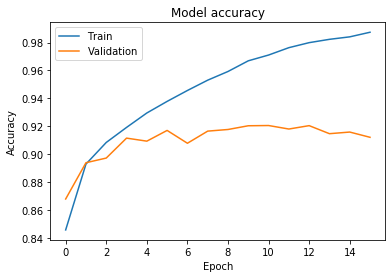

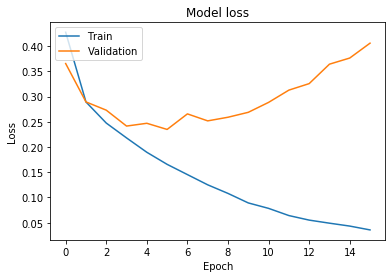

In [29]:
# Part 2
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [13]:
# Part 3
model.load_weights('best_params.hdf5')
loss, acc = model.evaluate(testX[:,:,:,np.newaxis], testY, verbose=2)

10000/1 - 2s - loss: 0.4669 - accuracy: 0.9128


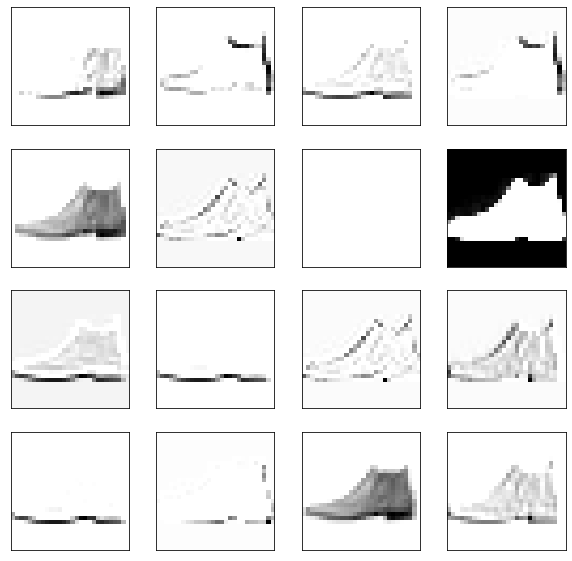

In [14]:
first_layer_output = model.layers[1].output 

activation_model = Model(inputs=model.input,outputs=first_layer_output)

activation = activation_model.predict(testX[:,:,:,np.newaxis])

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(activation[0,:,:,i], cmap=plt.cm.binary)
plt.show()


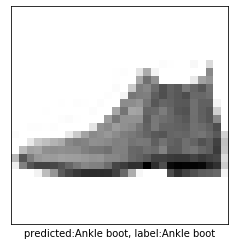

In [15]:
predictions = model.predict(testX[:,:,:,np.newaxis])
predictions = np.argmax(predictions, axis = 1)
plt.xticks([])
plt.yticks([])
plt.imshow(testX[0], cmap=plt.cm.binary)
plt.xlabel('predicted:{}, label:{}'.format(class_names[predictions[0]], class_names[testY[0]]))
plt.show()

In [16]:
import cv2 as cv
from imutils import build_montages

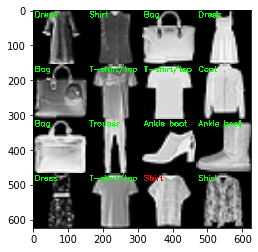

In [25]:
# Part 4
images = []
random_images = np.random.choice(np.arange(0,len(testY)),size=(16,))
for i in random_images:
    image = (testX[i] * 255)
    color = (0,255,0)
    if(predictions[i] != testY[i]):
        color=(255,0,0)
    image = cv.merge([image]*3)
    image = cv.resize(image, (156,156),interpolation=cv.INTER_LINEAR)
    cv.putText(image,class_names[testY[i]], (5,20),cv.FONT_HERSHEY_SIMPLEX, 0.75, color, 2)
    images.append(image)

montage = build_montages(images,(156,156), (4,4))[0]
plt.imshow(montage, cmap=plt.cm.binary)